## Decsion trees

In [1]:
import numpy as np
import pandas as pd
import data_preprocess as dp

In [2]:
data = pd.read_csv('./data/D2.csv')

In [3]:
data.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,...,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,insulin,change,diabetesMed,readmitted
0,AfricanAmerican,Female,[80-90),1,3,7,1,Invalid,33,0,...,No,No,No,No,No,No,Steady,False,True,1
1,Caucasian,Female,[70-80),1,3,5,3,Invalid,48,2,...,No,No,No,No,No,No,Steady,False,True,1
2,Caucasian,Female,[50-60),3,1,1,3,Orthopedics,25,1,...,No,No,No,No,No,No,Steady,False,True,0
3,AfricanAmerican,Female,[50-60),1,1,7,6,Invalid,41,0,...,No,No,No,No,No,No,Steady,False,True,1
4,AfricanAmerican,Male,[80-90),1,3,7,4,Invalid,22,0,...,No,No,No,No,No,No,Steady,False,True,1


### Steps to preprocess the data

- Revisit the data pre-processing steps from assignment 1
- Drop the columns with missing values - A1Cresult and max_glu_serum
- Reduce the number of unique values in the medical_specialty column, the admission_type_id column, the discharge_disposition_id column, and the admission_source_id column
- Convert the categorical columns into numerical columns using encoding
- Split the data into training and testing sets


In [4]:
df = dp.data_prep(data)

In [5]:
df

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,...,glipizide,glyburide,tolbutamide,insulin,change,diabetesMed,readmitted,admission_type,discharge_disposition,admission_source
0,AfricanAmerican,1,8,1,3,7,1,Other,33,0,...,0,0,0,1,False,True,1,Emergency,AdditonalCare,Emergency
1,Caucasian,1,7,1,3,5,3,Other,48,2,...,0,0,0,1,False,True,1,Emergency,AdditonalCare,Transfer
2,Caucasian,1,5,3,1,1,3,Surgical,25,1,...,0,0,0,1,False,True,0,Elective,Home,Referral
3,AfricanAmerican,1,5,1,1,7,6,Other,41,0,...,0,0,0,1,False,True,1,Emergency,Home,Emergency
4,AfricanAmerican,0,8,1,3,7,4,Other,22,0,...,0,0,0,1,False,True,1,Emergency,AdditonalCare,Emergency
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,AfricanAmerican,0,7,2,1,1,4,Internal Medicine,51,0,...,0,1,0,1,True,True,1,Emergency,Home,Referral
19996,Caucasian,0,5,1,3,7,9,Other,57,2,...,0,0,0,0,False,False,1,Emergency,AdditonalCare,Emergency
19997,Caucasian,0,8,1,6,7,3,Other,41,0,...,0,0,0,1,True,True,1,Emergency,AdditonalCare,Emergency
19998,Hispanic,0,5,1,6,7,3,Internal Medicine,49,0,...,0,0,0,1,False,True,1,Emergency,AdditonalCare,Emergency


In [6]:
# Drop the unnecessary id columns
df.drop(['admission_type_id', 'discharge_disposition_id', 'admission_source_id'], axis=1, inplace=True)

In [7]:
len(df)

20000

In [8]:
# drop the rows with where discharge_disposition is deceased
df = df[df.discharge_disposition != 'Deceased']

In [9]:
len(df)

19680

In [10]:
# use one-hot encoding for race, medical_specialty, admission_type, discharge_disposition, admission_source
df = pd.get_dummies(df, columns=['race', 'medical_specialty', 'admission_type', 'discharge_disposition', 'admission_source'], dtype=int)

In [11]:
df.head()

,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,...,admission_type_Elective,admission_type_Emergency,admission_type_Unknown,discharge_disposition_AdditonalCare,discharge_disposition_Home,discharge_disposition_Unknown,admission_source_Emergency,admission_source_Referral,admission_source_Transfer,admission_source_Unknown
0,1,8,1,33,0,14,0,1,1,9,...,0,1,0,1,0,0,1,0,0,0
1,1,7,3,48,2,7,0,0,2,9,...,0,1,0,1,0,0,0,0,1,0
2,1,5,3,25,1,15,0,0,0,8,...,1,0,0,0,1,0,0,1,0,0
3,1,5,6,41,0,19,0,0,0,9,...,0,1,0,0,1,0,1,0,0,0
4,0,8,4,22,0,12,0,0,1,8,...,0,1,0,1,0,0,1,0,0,0


In [12]:
y = df['readmitted']

In [13]:
X = df.drop('readmitted', axis=1)

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
rs = 42

In [16]:
X_mat = X.to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X_mat, y, test_size=0.3, stratify=y, random_state=rs)


In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [18]:
model = DecisionTreeClassifier(random_state=rs)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [19]:
model.get_params(deep=True)

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 42,
 'splitter': 'best'}

In [20]:
print(f'Training accuracy: {accuracy_score(y_train, model.predict(X_train))}')

Training accuracy: 1.0


In [21]:
print(f'Test accuracy: {accuracy_score(y_test, model.predict(X_test))}')
print(classification_report(y_test, model.predict(X_test)))

Test accuracy: 0.5575880758807588
              precision    recall  f1-score   support

           0       0.58      0.58      0.58      3107
           1       0.53      0.53      0.53      2797

    accuracy                           0.56      5904
   macro avg       0.56      0.56      0.56      5904
weighted avg       0.56      0.56      0.56      5904



In [22]:
importances = model.feature_importances_
feature_names = X.columns

In [23]:
indices = np.argsort(importances)
indices = np.flip(indices, axis=0)

indices = indices[:10]

for i in indices:
    print(f'{feature_names[i]}: {importances[i]}')

num_lab_procedures: 0.17608175862222414
num_medications: 0.14991690253665008
time_in_hospital: 0.08592341800370418
age: 0.0723311462062219
number_inpatient: 0.06769944854272662
num_procedures: 0.05557568597522135
number_diagnoses: 0.041102435034545755
insulin: 0.031860911765046525
gender: 0.02808434452820369
number_outpatient: 0.026766441632742097


In [24]:
from sklearn.model_selection import GridSearchCV

In [25]:
params = {'criterion': ['gini', 'entropy'],
          'max_depth': range(1, 16),
          'min_samples_leaf': [1,5,10,15,20]}

In [26]:
grid_search = GridSearchCV(model, param_grid=params, cv=10, n_jobs=-1, verbose=1, return_train_score=True)

In [27]:
grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 150 candidates, totalling 1500 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 16),
                         'min_samples_leaf': [1, 5, 10, 15, 20]},
             return_train_score=True, verbose=1)

In [28]:
print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best accuracy score: {grid_search.best_score_}")

Best parameters found: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1}
Best accuracy score: 0.6227475433542766


In [29]:
import matplotlib.pyplot as plt
import pandas as pd

In [30]:
# Convert cv_results_ to a pandas DataFrame
results = pd.DataFrame(grid_search.cv_results_)


In [31]:
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.038950,0.003627,0.004357,0.000501,gini,1,1,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.633527,0.628447,...,0.615825,0.617438,0.615986,0.615825,0.617066,0.615937,0.615937,0.617308,0.615999,0.001035
1,0.040940,0.003865,0.004399,0.000533,gini,1,5,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.633527,0.628447,...,0.615825,0.617438,0.615986,0.615825,0.617066,0.615937,0.615937,0.617308,0.615999,0.001035
2,0.034133,0.001624,0.003951,0.000470,gini,1,10,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.633527,0.628447,...,0.615825,0.617438,0.615986,0.615825,0.617066,0.615937,0.615937,0.617308,0.615999,0.001035
3,0.030640,0.001139,0.003454,0.000570,gini,1,15,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.633527,0.628447,...,0.615825,0.617438,0.615986,0.615825,0.617066,0.615937,0.615937,0.617308,0.615999,0.001035
4,0.030241,0.001352,0.003353,0.000450,gini,1,20,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.633527,0.628447,...,0.615825,0.617438,0.615986,0.615825,0.617066,0.615937,0.615937,0.617308,0.615999,0.001035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,0.079096,0.005362,0.002692,0.000749,entropy,15,1,"{'criterion': 'entropy', 'max_depth': 15, 'min...",0.584180,0.605225,...,0.771899,0.793676,0.771576,0.773431,0.771594,0.798290,0.782160,0.772804,0.778842,0.009293
146,0.076355,0.004975,0.002977,0.000710,entropy,15,5,"{'criterion': 'entropy', 'max_depth': 15, 'min...",0.584180,0.592163,...,0.752460,0.755767,0.749637,0.744233,0.746431,0.764739,0.759739,0.750060,0.751669,0.006417
147,0.074215,0.006531,0.002855,0.000748,entropy,15,10,"{'criterion': 'entropy', 'max_depth': 15, 'min...",0.585631,0.585631,...,0.729634,0.726488,0.727537,0.719552,0.724817,0.732801,0.732882,0.730381,0.727320,0.003982
148,0.072599,0.006231,0.003451,0.000960,entropy,15,15,"{'criterion': 'entropy', 'max_depth': 15, 'min...",0.602322,0.586357,...,0.713099,0.709873,0.712212,0.703017,0.705138,0.712396,0.708444,0.710622,0.708656,0.003537


In [32]:
import matplotlib.pyplot as plt


train_result = results.split0_train_score
test_result = results.split0_test_score
print("Total number of models: ", len(test_result))

Total number of models:  150


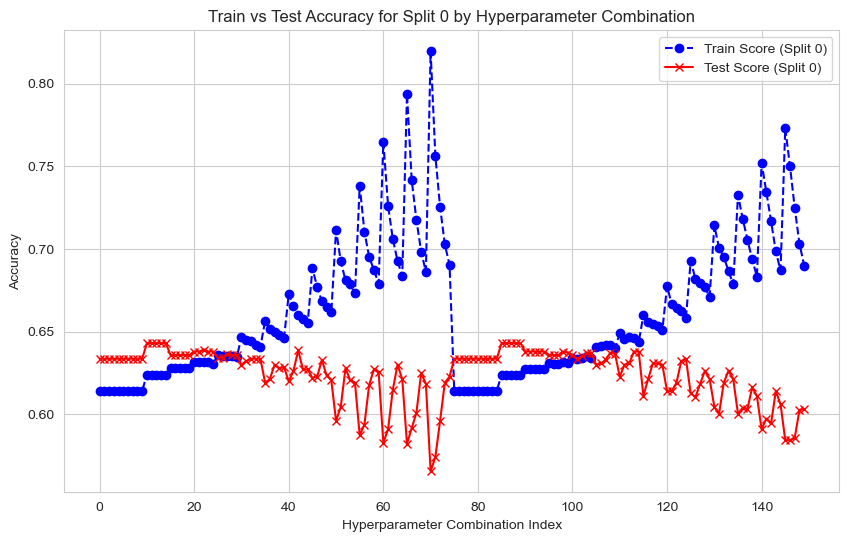

In [33]:
param_max_depth = results['param_max_depth']

# Use the index of hyperparameter combinations for plotting
param_index = range(len(train_result))

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(param_index, train_result, label='Train Score (Split 0)', marker='o', linestyle='--', color='b')
plt.plot(param_index, test_result, label='Test Score (Split 0)', marker='x', linestyle='-', color='r')

# Add labels and title
plt.xlabel('Hyperparameter Combination Index')
plt.ylabel('Accuracy')
plt.title('Train vs Test Accuracy for Split 0 by Hyperparameter Combination')
plt.legend()
plt.grid(True)
plt.show()

In [34]:
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1}

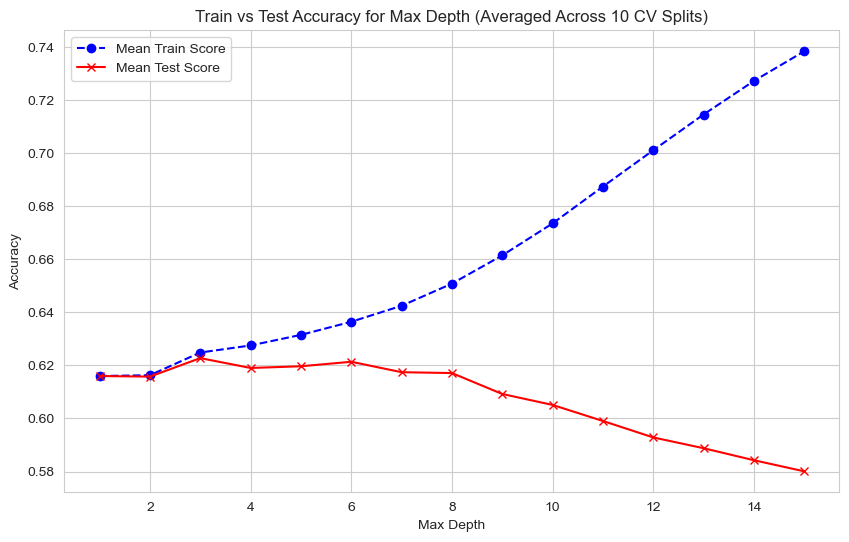

In [35]:
# Group results by max_depth to calculate mean test and train scores
mean_train_scores = results.groupby('param_max_depth')['mean_train_score'].mean()
mean_test_scores = results.groupby('param_max_depth')['mean_test_score'].mean()

# Plot the results for max_depth
plt.figure(figsize=(10, 6))
plt.plot(mean_train_scores.index, mean_train_scores, label='Mean Train Score', marker='o', linestyle='--', color='b')
plt.plot(mean_test_scores.index, mean_test_scores, label='Mean Test Score', marker='x', linestyle='-', color='r')

# Add labels and title
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Train vs Test Accuracy for Max Depth (Averaged Across 10 CV Splits)')
plt.legend()
plt.grid(True)
plt.show()

In [36]:
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1}

In [37]:
best_params = grid_search.best_params_

In [38]:
best_model = DecisionTreeClassifier(
    criterion=best_params['criterion'],
    max_depth=best_params['max_depth'],
    min_samples_leaf=best_params['min_samples_leaf'],
    random_state=42  # Keep the random_state for reproducibility
)

In [39]:
best_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [40]:
print(f'Training accuracy: {accuracy_score(y_train, best_model.predict(X_train))}')

Training accuracy: 0.6257984901277585


In [41]:
# classification report
print(classification_report(y_test, best_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.63      0.75      0.68      3107
           1       0.64      0.50      0.56      2797

    accuracy                           0.63      5904
   macro avg       0.63      0.63      0.62      5904
weighted avg       0.63      0.63      0.63      5904



In [42]:
from sklearn.metrics import roc_curve, roc_auc_score

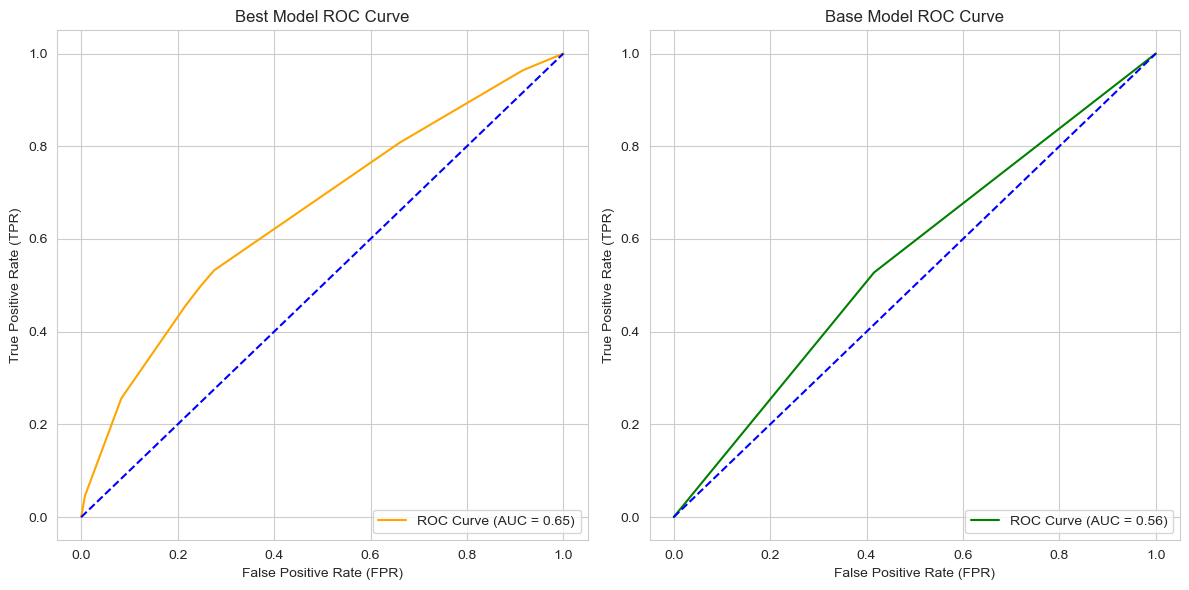

In [43]:
# Predicted probabilities for both models (for class 1)
y_proba_best = best_model.predict_proba(X_test)[:, 1]
y_proba_model = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC for both models
fpr_best, tpr_best, _ = roc_curve(y_test, y_proba_best)
roc_auc_best = roc_auc_score(y_test, y_proba_best)

fpr_model, tpr_model, _ = roc_curve(y_test, y_proba_model)
roc_auc_model = roc_auc_score(y_test, y_proba_model)

# Create subplots for the two models
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Plot ROC for best_model
ax[0].plot(fpr_best, tpr_best, color='orange', label=f'ROC Curve (AUC = {roc_auc_best:.2f})')
ax[0].plot([0, 1], [0, 1], color='blue', linestyle='--')
ax[0].set_xlabel('False Positive Rate (FPR)')
ax[0].set_ylabel('True Positive Rate (TPR)')
ax[0].set_title('Best Model ROC Curve')
ax[0].legend(loc='lower right')
ax[0].grid(True)

# Plot ROC for model
ax[1].plot(fpr_model, tpr_model, color='green', label=f'ROC Curve (AUC = {roc_auc_model:.2f})')
ax[1].plot([0, 1], [0, 1], color='blue', linestyle='--')
ax[1].set_xlabel('False Positive Rate (FPR)')
ax[1].set_ylabel('True Positive Rate (TPR)')
ax[1].set_title('Base Model ROC Curve')
ax[1].legend(loc='lower right')
ax[1].grid(True)

# Show the plots
plt.tight_layout()
plt.show()